<h1 style="background-color:#0071BD;color:white;text-align:center;padding-top:0.8em;padding-bottom: 0.8em">
Ordinary Least Squares Optimization
</h1>

Accompanying notebook for the recipe:

  * Christian Bauckhage: "NumPy / SciPy Recipes for Data Science: Ordinary Least Squares Optimization",<br/> Technical Report, March 2015 ([Download from ReseachGate](https://www.researchgate.net/publication/273133972_NumPy_SciPy_Recipes_for_Data_Science_Ordinary_Least_Squares_Optimization))

  * Abstract of the paper: *In this note, we study least squares optimization for parameter estimation. By means of the basic example of a linear regression task, we explore different formulations of the ordinary least squares problem, show how to solve it using **NumPy** or **SciPy**, and provide suggestions for practical applications.*
    
<p style="background-color:#66A5D1;padding-top:0.2em;padding-bottom: 0.2em" />

In [1]:
%run "lsqPlot.ipynb"

In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Example data

In [4]:
def create_data(n, xmin=-2, xmax=12, a=1.1, b=2.0):
    x = rnd.random(n) * (xmax - xmin) + xmin
    y = a * x + b + rnd.randn(n) * 0.5
    return x, y

In [5]:
x, y = create_data(25)

In [6]:
for xi, yi in zip(x, y):
    print('({:.2f}, {:.2f})'.format(xi, yi), end=', ')

(4.00, 5.80), (8.77, 11.87), (11.31, 13.72), (0.35, 3.25), (11.30, 14.56), (6.31, 8.95), (11.65, 14.43), (8.62, 11.29), (11.01, 14.77), (-1.46, -0.54), (3.05, 5.94), (1.82, 4.40), (3.36, 5.14), (-0.14, 1.45), (8.09, 11.67), (1.19, 3.39), (11.05, 13.84), (-0.60, 1.49), (-1.54, 0.29), (-0.30, 1.04), (9.34, 12.24), (5.15, 7.71), (9.31, 11.39), (2.84, 6.07), (1.10, 3.68), 

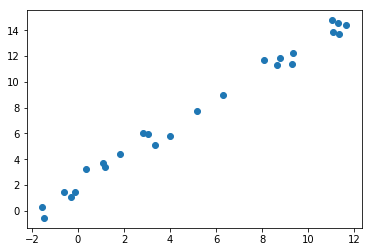

In [7]:
plt.scatter(x, y)
plt.show()

### Ordinary Least Squares

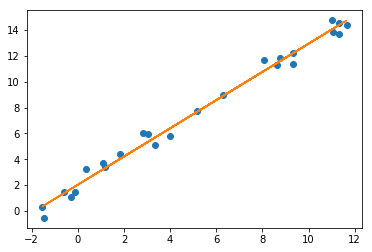

In [8]:
X = np.vander(x, 2)
w = la.lstsq(X, y)[0]
yhat = X.dot(w)

plt.plot(x, y, 'o')
plt.plot(x, yhat, '-')
plt.show()

## Comparison of Implementation Variants

### Computing a data matrix for linear regression

In [9]:
def data_matrix_V1(x):
    n = len(x)
    return np.vstack((x, np.ones(n))).T

def data_matrix_V2(x):
    return np.vstack((x, np.ones_like(x))).T
    
def data_matrix_V3(x):
    return np.vander(x, 2)

#### All three variants create the same matrix

In [10]:
x = [4.7, 1.1]

print(data_matrix_V1(x)); print()
print(data_matrix_V2(x)); print()
print(data_matrix_V3(x))

[[4.7 1. ]
 [1.1 1. ]]

[[4.7 1. ]
 [1.1 1. ]]

[[4.7 1. ]
 [1.1 1. ]]


### Solving Least Squares for Linear Regression

In [11]:
def lsq_solution_V1(X, y):
    w = la.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

def lsq_solution_V2(X, y):
    w = np.dot(la.pinv(X), y)
    return w

def lsq_solution_V3(X, y):
    w, residual, rank, svalues = la.lstsq(X, y)
    return w

#### All three variants create the same regression line

Version 1, w = [1.07238349 2.13211921]


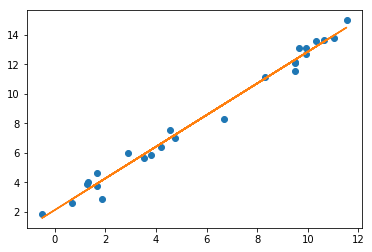


Version 2, w = [1.07238349 2.13211921]


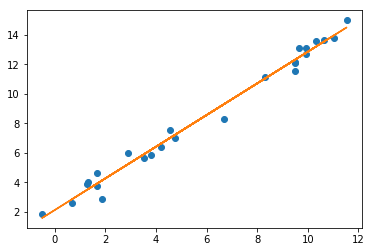


Version 3, w = [1.07238349 2.13211921]


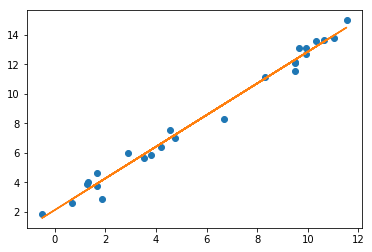

In [12]:
n = 25
x, y = create_data(n)

X = np.vander(x, 2)
w1 = lsq_solution_V1(X, y)
yhat1 = X.dot(w1)

w2 = lsq_solution_V2(X, y)
yhat2 = X.dot(w2)

w3 = lsq_solution_V3(X, y)
yhat3 = X.dot(w3)

print('Version 1, w =', w1)
plt.plot(x, y, 'o')
plt.plot(x, yhat1, '-')
plt.show()
print()

print('Version 2, w =', w2)
plt.plot(x, y, 'o')
plt.plot(x, yhat2, '-')
plt.show()
print()

print('Version 3, w =', w3)
plt.plot(x, y, 'o')
plt.plot(x, yhat3, '-')
plt.show()

### Performance comparison

In [13]:
import timeit

print(9*' '+'n', end='')
for v in [1, 2, 3]:
    print(8*' ' + 'V{}'.format(v), end='')
print()

for n in [100, 1_000, 10_000, 100_000, 1_000_000]:
    print('{:10}'.format(n), end='')
    for v in [1, 2, 3]:
        t = timeit.timeit(
            stmt    = 'lsq_solution_V{}(X, y)'.format(v), 
            setup   = 'x, y = create_data(n); X = np.vander(x, 2)', 
            number  = 100, 
            globals = globals()
        )
        print('{:10.3f}'.format(t), end='')
    print()

         n        V1        V2        V3
       100     0.002     0.011     0.005
      1000     0.003     0.009     0.006
     10000     0.008     0.036     0.016
    100000     0.068     0.141     0.061
   1000000     0.558     1.508     0.747


## Recreating the nicer plots of the paper

In [14]:
def dataXYBoundingBox(X, extension=0.1):
    xmin = X[0, :].min(); xmax = X[0,:].max(); dx = xmax - xmin
    ymin = X[1, :].min(); ymax = X[1,:].max(); dy = ymax - ymin
    
    return [xmin - extension * dx, xmax + extension * dx,
            ymin - extension * dy, ymax + extension * dy]

In [15]:
x, y = create_data(25)
X = np.vstack((x,y)) 

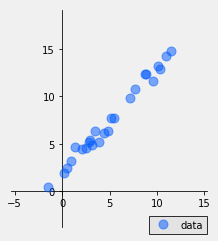

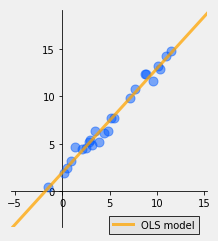

w =  [1.09932018 1.95329487]


In [16]:
limits = dataXYBoundingBox(X, extension=0.3)

C = np.vander(x, 2)
w = la.lstsq(C, y)[0]

umin = np.floor(limits[0])
umax = np.ceil (limits[1])
u = np.array([umin,umax])
v = np.dot(np.vander(u, 2), w)
M = np.vstack((u,v))


plotXYData(X, xlab='data', cart=True, lims=limits, legloc=[0.7,-0.03])
plotXYData(X, MS=[M], mlabs=['OLS model'], cart=True, lims=limits, legloc=[0.5,-0.03])
print ('w = ', w)

<table style="width:100%">
  <tr>
      <td colspan="1" style="text-align:left;background-color:#0071BD;color:white">
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">
            <img alt="Creative Commons License" style="border-width:0;float:left;padding-right:10pt"
                 src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" />
        </a>
        &copy; C. Bauckhage and O. Cremers<br/>
        Licensed under a 
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/" style="color:white">
            CC BY-NC 4.0
        </a>.
      </td>
      <td colspan="2" style="text-align:left;background-color:#66A5D1">
          <b>Acknowledgments:</b>
          This material was prepared within the project
          <a href="http://www.b-it-center.de/b-it-programmes/teaching-material/p3ml/" style="color:black">
              P3ML
          </a> 
          which is funded by the Ministry of Education and Research of Germany (BMBF)
          under grant number 01/S17064. The authors gratefully acknowledge this support.
      </td>
  </tr>
</table>